## 5. 混合分布モデルによる逐次更新型異常検知
### 5.1 混合分布モデルとその逐次更新
実データの解析においては、系がいくつかの異なる動作モードを持つ場合がある。  
**混合モデル**とはこれらを確率分布として表現したもので、次のような形をとる。
$$
p(\boldsymbol{x}|\Theta)=\sum_{i=1}^K\pi_kp_k(\boldsymbol{x}|\boldsymbol{\theta}_k),\ \pi_1+\cdots+\pi_K=1
$$
ただし、$p_k(\boldsymbol{x}|\boldsymbol{\theta}_k)$は$\boldsymbol{x}$について規格化された確率分布である。  
$\boldsymbol{\theta}_k$は第$k$番目の分布に含まれるパラメータ、$\Theta$は右辺に現れる未知パラメータの集まりを表す記号で、  
明示的に書くと$\Theta=\{\pi_1,\cdots,\pi_K,\boldsymbol{\theta}_1,\cdots,\boldsymbol{\theta}_K \}$である。  
和の中の第$k$項を第$k$**要素(またはコンポーネント、クラスター)**と呼ぶ。  
また、$\pi_k$を第$k$クラスターの**混合重み**と呼ぶ。  
データ$D$が$\{\boldsymbol{x}^{(1)},\boldsymbol{x}^{(2)},\cdots,\boldsymbol{x}^{(N)} \}$のように与えられれば、混合分布のパラメータ$\Theta$は最尤推定で原理的には求められる。  
$$
L(\Theta|D)=\sum_{n=1}^N\ln{\sum_{k=1}^K}\pi_kp_k(\boldsymbol{x}^{(n)}|\boldsymbol{\theta}_k)
$$
対数の中に総和が入っているために、各パラメータによる微分を0と置いても簡単な式にはならず、解析的に最適解を求めることはできない。  
一般に混合分布のパラメータ推定のためには、EM法と呼ばれる手法が使われる。  
混合分布モデルにおいて確率分布$p_l(\boldsymbol{x}|\boldsymbol{\theta}_k)$として正規分布$N(\boldsymbol{x}|\boldsymbol{\mu}_k,\Sigma_k)$を選んだものを**混合正規分布**と呼ぶ。  
この場合$\boldsymbol{\theta}_k=\{\boldsymbol{\mu}_k ,\Sigma_k\}$となる。  
  
実用上「直近の観測値は重視するが古い観測値は徐々に忘れたい」という状況がある。  
これは観測された標本に異なる重みを考えることで実現できる。  
混合正規分布の対数尤度の式において、
$$
L(\Theta|D)=\sum_{n=1}^tw_t^{(n)}\ln{\sum_{k=1}^K}\pi_kN(\boldsymbol{x}^{(n)}|\boldsymbol{\mu}_k,\Sigma_k)
$$
のように標本番号$n$ごとに異なる重み$w_t^{(n)}$を導入する。  
ここで、時刻$t$までに観測された標本集合を$D^{(t)}=\{\boldsymbol{x}^{(1)},\cdots,\boldsymbol{x}^{(t)} \}$と書いた。  
モデルの推定は、時刻$t$の時点までに得られたデータに基づいて行うことになる。  
一般に、観測値を得るたびに重みを振りなおすので、重みは現在の時刻$t$にも依存する。  
>時刻$t-1$において、モデルのパラメータ
$$
\Theta=\{\pi_1,\cdots,\pi_K,\boldsymbol{\mu}_1,\cdots,\boldsymbol{\mu}_K,\Sigma_1,\cdots,\Sigma_K \}
$$
の数値が得られていると仮定する。  
時刻$t$において観測した標本$\boldsymbol{x}^{(t)}$だけを使い(それ以前のデータを参照することなしに)、  
$L(\Theta|D^{(t)})$を最大化するように、パラメータ$\Theta$を更新する

手元にある訓練標本全部を使ってモデルを学習する方法を**一括型学習(バッチ学習)**と呼ぶ。  
これに対して、標本を観測するたびにモデルを修正していくタイプの学習方法を**逐次更新型学習(オンライン学習)**と呼ぶ。

### 5.2 イエンセンの不等式による和と対数関数の順序交換
**イエンセンの不等式**は次のような関係式である。
>$c_1+\cdots+c_K=1$を満たす非負の係数$\{c_i\}$に対して、次式が成り立つ。  
$$
\ln{\biggl(\sum_{k=1}^Kc_kX_k \biggr)}\geq \sum_{k=1}^Kc_k\ln{(X_k)}
$$
等号が成り立つのは$X_1=\cdots=X_K$のときに限られる。  
連続変数の場合、任意の確率分布$q(\boldsymbol{x})$が可積分な関数$g(\boldsymbol{x})$に対して、次式が成り立つ。
$$
\ln{\int d\boldsymbol{x}q(\boldsymbol{x})g(\boldsymbol{x})}\geq\int d\boldsymbol{x}q(\boldsymbol{x})\ln{g(\boldsymbol{x})}
$$

対数だけでなく、一般に上に凸な関数$f$についても成り立つ。  
$K=2,c_1=c_2=\frac{1}{2}$の場合を図に示す。  
$X_1$(左端)と$X_2$(右端)の中点$\frac{X_1+X_2}{2}$では、$f(\frac{X_1+X_2}{2})$は明らかに$\frac{f_1+f_2}{2}$より大きい。

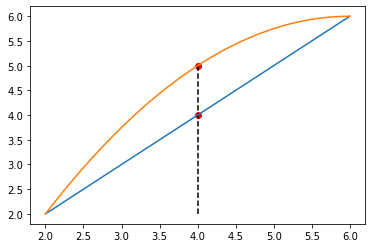

In [28]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(2,6.1, 0.1)
y1 = x
y2 = -1/4*(x-6)**2+6

plt.plot(x, y1);
plt.plot(x, y2);
plt.vlines(4, 2, 5, linestyles='--', color='black');
plt.scatter(4, 4, color='red');
plt.scatter(4, 5, color='red');

EM法では、イエンセンの不等式で対数尤度の下限を求め、その下限を最大化することで本体を最大化する。  
混合正規分布の対数尤度の下限を求める。  
各$n$について$q_1^{(n)}+\cdots+q_K^{(n)}=1$となるような係数を恣意的に作り出す。  
$$
L(\Theta|D^{(t)})=\sum_{n=1}^tw_t^{(n)}\ln{\sum_{k=1}^Kq_k^{(n)}}\frac{\pi_kN(\boldsymbol{x}^{(n)}|\boldsymbol{\mu}_k),\Sigma_k}{q_k^{(n)}}
$$
この式にイエンセンの不等式を適用すると次のような下限の式が得られる。  
$$
L_{下限}(\Theta|D^{(t)})=\sum_{n=1}^tw_t^{(n)}\sum_{k=1}^Kq_k^{(n)}\ln{\frac{\pi_kN(\boldsymbol{x}^{(n)}|\boldsymbol{\mu}_k),\Sigma_k}{q_k^{(n)}}}
$$

### 5.3 EM法による重み付き対数尤度の最大化
導出された重み付き対数尤度の下限を使って、パラメータの最尤推定を行う。  
下限には、もともとのパラメータ$\{\pi_k,\boldsymbol{\mu}_k,\Sigma_k\}$と、イエンセンの不等式を使う際に導入した$\{q_k^{(t)}\}$という2種類の未知量がある。  
**EM法**では、片方を既知として片方を求める、という具合に両者を求めていく。  
  
#### 帰属度$q_k^{(n)}$についての最適化
$\{\pi_k,\boldsymbol{\mu}_k,\Sigma_k\}$の推定値が数値として手元に与えられているとする。  
この前提だと$L_{下限}(\Theta|D^{(t)})$に含まれる未知量は$\{q_k^{(t)}\}$だけであるので、これを最適に決めることを考える。  
制約$q_1^{(n)}+\cdots+q_K^{(n)}=1$をラグランジュ乗数$\lambda_n$で取り込むことで、最適解の条件は、
$$
0=\frac{\partial}{\partial q_k^{(n)}}\biggl[L_{下限}-\sum_{n'=1}^t\lambda_{n'}\sum_{l=1}^Kq_l^{(n')} \biggr]
$$
となり、微分を実行すると、
$$
q_k^{(n)}=\pi_kN(\boldsymbol{x}^{(n)}|\boldsymbol{\mu}_k,\Sigma_k)\exp{\biggl(-1-\frac{\lambda_n}{w_t^{(n)}} \biggr)}
$$
という解が出る。  
両辺の$k$に関する和を取り、制約条件を使うことで$\lambda_n$を含む指数関数の部分は簡単に定められる。  
結局、解として、
$$
q_k^{(n)}=\frac{\pi_kN(\boldsymbol{x}^{(n)}|\boldsymbol{\mu}_k,\Sigma_k)}{\sum_{l=1}^K\pi_lN(\boldsymbol{x}^{(n)}|\boldsymbol{\mu}_l,\Sigma_l)}
$$
が得られる。  
$q_k^{(n)}$は、標本$\boldsymbol{x}^{(n)}$が与えられときに、その標本が第$k$クラスターに所属する確率を表す。  
これを特に、標本$\boldsymbol{x}^{(n)}$の第$k$クラスターへの**帰属度(もしくは負担率)**と呼ぶ。

#### 混合重みの最適化
今度は逆に、帰属度$q_k^{(n)}$が数値として求められている前提で、パラメータの方を更新することを考える。  
まず、$\{\pi_k\}$について考える。  
$\pi_1+\cdots+\pi_K=1$という制約があるので、ラグランジュ乗数$\lambda$を使って次のような最適条件が得られる。  
$$
0=\frac{\partial}{\partial \pi_k}\biggl[L_{下限}-\lambda\sum_{l=1}^K\pi_l \biggr]
$$
微分を実行すると、
$$
\hat{\pi}_k^{(t)}=\frac{1}{\sum_{n'=1}^tw_t^{(n')}}\sum_{n=1}^tw_t^{(n)}q_k^{(n)}
$$
という解が求められる。

#### 平均と共分散の最適化
残るパラメータ$\{\boldsymbol{\mu}_k,\Sigma_k\}$についても混合重みと同様に、  
$\{q_k^{(n)}\}$が数値として求まっているという前提で、重み付き対数尤度の下限を最大化することでパラメータを求める。  
今回は制約条件はないので簡単に計算できる。  
正規分布の定義式を使って、$L_{下限}$の$\boldsymbol{\mu}_k$に対する極大条件は、
$$
\boldsymbol{0}=\frac{\partial L_{下限}}{\partial \boldsymbol{\mu}_k}=\sum_{n=1}^tw_t^{(n)}q_k^{(n)}\Sigma_k^{-1}(\boldsymbol{x}^{(n)}-\boldsymbol{\mu}_k)
$$
となり、
$$
\hat{\boldsymbol{\mu}}_k^{(t)}=\frac{1}{\sum_{n'=1}^tw_t^{(n')}q_k^{(n')}}\sum_{n=1}^tw_t^{(n)}q_k^{(n)}\boldsymbol{x}^{(n)}
$$
という解が得られる。  
標本重み$w_t^{(n)}$と帰属度を使った重み付き平均と解釈できる。  
共分散行列$\Sigma_k$については、
$$
0=\frac{\partial L_{下限}}{\partial \Sigma^{-1}}=\frac{1}{2}\sum_{n=1}^tw_t^{(n)}q_k^{(n)}\bigl\{-(\boldsymbol{x}^{(n)}-\boldsymbol{\mu}_k)(\boldsymbol{x}^{(n)}-\boldsymbol{\mu}_k)^T+\Sigma_k \bigr\}
$$
となり。
$$
\begin{align}
\hat{\Sigma}_k^{(t)}&=\frac{1}{\sum_{n'=1}^tw_t^{(n')}q_k^{(n')}}\sum_{n=1}^tw_t^{(n)}q_k^{(n)}(\boldsymbol{x}^{(n)}-\hat{\boldsymbol{\mu}}_k^{(t)})(\boldsymbol{x}^{(n)}-\hat{\boldsymbol{\mu}}_k^{(t)})^T\\
&=\frac{1}{\sum_{n'=1}^tw_t^{(n')}q_k^{(n')}}\sum_{n=1}^tw_t^{(n)}q_k^{(n)}-\hat{\boldsymbol{\mu}}_k^{(t)}\hat{\boldsymbol{\mu}}_k^{(t)T}
\end{align}
$$
という解が得られる。

### 5.4 混合重みのスムージング
初期値の与え方が不適切だと、1個くらいの標本しか属さないようなクラスターが出てしまい、数値的に不安定になる現象が見られる。  
これを防ぐために、$\{\pi_k\}$にゲタを履かせておくのが有用である。  
これは、$\{\pi_k\}$にディリクレ事前分布を付すことで行える。  
$$
\begin{align}
0&=\frac{\partial}{\partial \pi_k}\biggl[L_{下限}+\ln{Dir(\boldsymbol{\pi}|\boldsymbol{\alpha})}-\lambda\sum_{l=1}^K\pi_l \biggr]\\
&=\frac{\partial}{\partial \pi_k}\biggl[\sum_{n=1}^tw_t^{(n)}\sum_{l=1}^Kq_l^{(n)}\ln{\pi_l}+\sum_{l=1}^K(\alpha_l-1)\ln{\pi_l}-\lambda\sum_{l=1}^K\pi_l \biggr]
\end{align}
$$
が最適解(最大事後確率解)となる。  
微分を実行すると、次のような解が得られる。  
$$
\tilde{\pi}_k^{(t)}=\sum_{n=1}^tw_t^{(n)}q_k^{(n)}\\
\hat{\pi}_k^{(t)}=\frac{\tilde{\pi}_k^{(t)}+\gamma}{K\gamma+\sum_{l=1}^K\tilde{\pi}_k^{(t)}}
$$
ただし、ディリクレ分布のパラメータについて、$\alpha_k=1+\gamma$のように$k$によらない一定値に仮定した。

### 5.5 重みの選択と逐次更新型異常検知モデル
最終目標は、今観測したデータ$\boldsymbol{x}^{(t)}$だけを使ってモデルのパラメータを更新する式を導くことである。  
逐次更新モデルの導出のために、重み係数として、
$$
w_t^{(n)}=\beta(1-\beta)^{t-n}
$$
を考える。  
ここで、$0<\beta<1$は**忘却率(割引率)**と呼ばれる定数である。  
重み係数の定義を、$\tilde{\pi}_k^{(t)}$の定義式において$t-1$と$t$で代入すると、
$$
\tilde{\pi}_k^{(t-1)}=\beta\sum_{n=1}^{t-1}(1-\beta)^{t-1-n}q_k^{(n)}\\
\tilde{\pi}_k^{(t)}=\beta q_k^{(t)}+\beta\sum_{n=1}^{t-1}(1-\beta)^{t-1-n}q_k^{(n)}
$$
となるで、
$$
\tilde{\pi}_k^{(t)}=(1-\beta)\tilde{\pi}_k^{(t-1)}+\beta q_k^{(t)}
$$
のような更新式が成り立つ。  
$\boldsymbol{\mu}_k$の推定値については、
$$
\tilde{\boldsymbol{\mu}}_k^{(t)}=\sum_{n=1}^tw_t^{(n)}q_k^{(n)}\boldsymbol{x}^{(n)}
$$
と定義し、また、$\Sigma_k$については、
$$
\tilde{\Sigma_k^{(t)}}=\sum_{n=1}^tw_t^{(n)}q_k^{(n)}\boldsymbol{x}^{(n)}\boldsymbol{x}^{(n)T}
$$
と定義すると、混合重みと同様に、次の更新式が導ける。
$$
\tilde{\boldsymbol{\mu}}_k^{(t)}=(1-\beta)\tilde{\boldsymbol{\mu}}_k^{(t-1)}+\beta q_k^{(t)}\boldsymbol{x}^{(t)}\\
\tilde{\Sigma_k^{(t)}}=(1-\beta)\tilde{\Sigma_k^{(t-1)}}+\beta q_k^{(t)}\boldsymbol{x}^{(t)}\boldsymbol{x}^{(t)T}
$$

混合正規分布の逐次更新型EM法による異常検知のアルゴリズムを示す。
>- 初期化：混合正規分布のパラメータ
$$
\Theta=\{\tilde{\pi}_1,\cdots,\tilde{\pi}_K,\tilde{\boldsymbol{\mu}}_1,\cdots,\tilde{\boldsymbol{\mu}}_K,\tilde{\Sigma}_1,\cdots,\tilde{\Sigma}_K\}
$$
に適当な初期値を設定する。  
また、$q_1=\cdots=q_K=1/K$と初期化しておく。  
忘却率$\beta$、異常度の閾値$a_{th}$、スムージングの定数$\gamma$を与える。
>- パラメータ推定：各時刻$t$において標本$\boldsymbol{x}$を観測するたびに次の計算を行う。  
　- $\{\tilde{\pi}_k,\tilde{\boldsymbol{\mu}}_k,\tilde{\Sigma}_k\}$を次式で更新する
$$
\tilde{\pi}_k←(1-\beta)\tilde{\pi}_k+\beta q_k\\
\tilde{\boldsymbol{\mu}}_k←(1-\beta)\tilde{\boldsymbol{\mu}}_k+\beta q_k\boldsymbol{x}\\
\tilde{\Sigma}_k←(1-\beta)\tilde{\Sigma}_k+\beta q_k\boldsymbol{x}\boldsymbol{x}^T
$$
　- モデルのパラメータ$\{\pi_k,\boldsymbol{\mu}_k,\Sigma_k\}$を次式で求める。
$$
\pi_k=\frac{\tilde{\pi}_k+\gamma}{K\gamma+\sum_{l=1}^K\tilde{\pi}_l}\\
\boldsymbol{\mu}_k=\frac{\tilde{\boldsymbol{\mu}}_k}{\tilde{\pi}_k}\\
\Sigma_k=\frac{\tilde{\Sigma}_k}{\tilde{\pi}_k}-\boldsymbol{\mu}_k\boldsymbol{\mu}_k^T
$$
　- 現在のパラメータ推定値を用いて$\boldsymbol{x}$の帰属度$q_k$を次式で求める。
$$
q_k=\frac{\pi_kN(\boldsymbol{x}|\boldsymbol{\mu}_k,\Sigma_k)}{\sum_{l=1}^K\pi_lN(\boldsymbol{x}|\boldsymbol{\mu}_l,\Sigma_l)}
$$
>- 異常判定：時刻$t$における異常度を
$$
a(\boldsymbol{x})=-\ln{\sum_{k=1}^K}\pi_kN(\boldsymbol{x}|\boldsymbol{\mu}_k,\Sigma_k)
$$
により計算し、$a(\boldsymbol{x})>a_{th}$なら警報を出す

In [29]:
import numpy as np
from scipy import linalg

def N_Gaussian(x, mu, sigma):
    X = np.matrix(x).T
    mu = np.matrix(mu).T
    sigma = np.matrix(sigma)

    x_mu = X - mu

    w1 = np.matmul(np.linalg.inv(sigma), x_mu)
    w2 = -0.5 * np.matmul(x_mu.T, w1)

    det = np.linalg.det(sigma)

    N = 1/(np.sqrt(((2*np.pi)**len(x)) * np.abs(det))) * np.exp(w2)
    return N[0,0]

def box_muller(n):
    r1 = np.random.rand(n)
    r2 = np.random.rand(n)

    x = np.sqrt(-2*np.log(r1)) * np.sin(2*np.pi*r2)
    return x

def sampling_gaus(n, sample, mu, sigma):
    L = np.linalg.cholesky(sigma)

    Y = np.array([np.dot(L, box_muller(n)) for _ in range(sample)]) + mu
    return Y

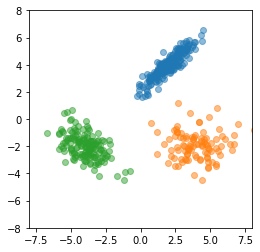

In [1007]:
import matplotlib.pyplot as plt

data1 = sampling_gaus(2, 200, [2,4], [[1, 0.9], [0.9,1]])
data2 = sampling_gaus(2, 100, [4,-2], [[2, 0], [0,1]])
data3 = sampling_gaus(2, 150, [-4,-2], [[1, -0.5], [-0.5,1]])


x = np.concatenate([data1, data2, data3])
y = np.array([0]*200+[1]*100+[2]*150)

plt.figure(figsize=(4,4))
plt.scatter(data1[:,0], data1[:,1], alpha=.5);
plt.scatter(data2[:,0], data2[:,1], alpha=.5);
plt.scatter(data3[:,0], data3[:,1], alpha=.5);
plt.xlim(-8, 8);
plt.ylim(-8, 8);

In [1008]:
arr = np.arange(450)
np.random.shuffle(arr)

n = 3
dim = 2
T = 451

pi_tilde = np.zeros([T, n])
mu_tilde = np.zeros([T, n, dim])
S_tilde = np.zeros([T, n, dim, dim])

q = np.zeros([T, n])
pi = np.zeros_like(pi_tilde)
mu = np.zeros_like(mu_tilde)
S = np.zeros_like(S_tilde)

beta = 0.7
gamma = 1

q[0] = np.ones(n)/n
#pi_tilde[0] = np.abs(np.random.rand(n))
pi_tilde[0] = np.ones(n)/n
#pi_tilde[0] = pi_tilde[0] / np.sum(pi_tilde[0])

mu_tilde[0] = np.random.normal(0,5,size=(3,2))
#mu_tilde[0] = np.array([[3,4],
#                        [4,-3],
#                        [-4,-4]])


#S_tilde[0] = np.random.rand(n,2,2)
#S_tilde[0][:,0,1] = S_tilde[0][:,1,0] = np.random.rand(3)
S_tilde[0][:,1,1] = S_tilde[0][:,0,0] = 1

def update_params(beta, x, q, t):
    pi_tilde_new = (1-beta)*pi_tilde[t-1] + beta*q[t-1]
    mu_tilde_new = (1-beta)*mu_tilde[t-1] + beta*q[t-1].reshape(n,1)*x
    S_tilde_new  = (1-beta)*S_tilde[t-1]  + beta*q[t-1].reshape(n,1,1)*np.tile(x.reshape(dim,1)*x, (n,1,1))
    return pi_tilde_new, mu_tilde_new, S_tilde_new

def calc_params(pi_tilde, mu_tilde, S_tilde, t):
    pi_new = (pi_tilde[t] + gamma) / (n * gamma + np.sum(pi_tilde[t]))
    mu_new = mu_tilde[t] / pi_tilde[t].reshape(n,1)
    S_new  = S_tilde[t] / (pi_tilde[t].reshape(n,1,1))-(mu_new.reshape(n,dim,1))@(mu_new.reshape(n,1,dim))

    return pi_new, mu_new, S_new

def calc_q(x, pi, mu, S, t):
    p = np.zeros(n)
    for i in np.arange(len(pi[t])):
        g = N_Gaussian(x, mu=mu[t][i], sigma=S[t][i])
        p[i] = pi[t,i]*g
    return p / np.sum(p)

for t in np.arange(1,T):
    xi = x[arr[t-1]]
    pi_tilde[t], mu_tilde[t], S_tilde[t] = update_params(beta, xi, q, t=t)
    pi[t], mu[t], S[t] = calc_params(pi_tilde, mu_tilde, S_tilde, t=t)
    q[t] = calc_q(xi, pi, mu, S, t=t)
    #pi_tilde[t], mu_tilde[t], S_tilde[t] = pi[t-1], mu[t-1], S[t-1]

In [1009]:
mu

array([[[ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[-8.92807645,  0.92926033],
        [-0.69309292,  7.12071439],
        [-5.70408907,  3.29066699]],

       [[-4.98709039, -1.29811162],
        [-2.5651386 ,  1.11650846],
        [-4.20450162, -0.49389273]],

       ...,

       [[ 0.38216477,  2.275708  ],
        [ 0.38221197,  2.27576804],
        [ 0.38218617,  2.27573521]],

       [[ 2.21670762,  3.80497628],
        [ 2.21634708,  3.80468195],
        [ 2.21654437,  3.80484301]],

       [[ 2.3361313 ,  4.03169024],
        [ 2.33599972,  4.0315575 ],
        [ 2.33607174,  4.03163015]]])

In [1010]:
S

array([[[[  0.        ,   0.        ],
         [  0.        ,   0.        ]],

        [[  0.        ,   0.        ],
         [  0.        ,   0.        ]],

        [[  0.        ,   0.        ],
         [  0.        ,   0.        ]]],


       [[[-67.54167077,  13.00102974],
         [ 13.00102974,   2.00051557]],

        [[ 11.68850054,   9.63983919],
         [  9.63983919, -47.84053306]],

        [[-20.36775374,  23.47478008],
         [ 23.47478008,  -7.96444894]]],


       [[[-12.28890232,   0.28122741],
         [  0.28122741,   2.31601239]],

        [[  5.95495976,   9.3844881 ],
         [  9.3844881 ,   2.6244566 ]],

        [[ -5.11433525,   4.58582705],
         [  4.58582705,   3.7058114 ]]],


       ...,


       [[[  5.95086009,   4.55940789],
         [  4.55940789,   4.00252636]],

        [[  5.95439642,   4.56193722],
         [  4.56193722,   4.00469529]],

        [[  5.95246146,   4.56055323],
         [  4.56055323,   4.00350852]]],


       [[[  3.2267

In [981]:
mu

array([[[ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[ 6.78456994,  5.29120732],
        [ 1.48634868,  2.91088417],
        [-0.90421618,  7.94086358]],

       [[ 3.59423761,  1.70046108],
        [ 0.45403858, -1.28689139],
        [-0.51847974,  4.65559334]],

       ...,

       [[ 1.48021328,  2.43246992],
        [ 1.47681963,  2.43061024],
        [ 1.48423662,  2.43464628]],

       [[ 2.10632682,  0.42059572],
        [ 2.10688431,  0.41499863],
        [ 2.10568327,  0.4272249 ]],

       [[ 1.96091382,  2.45653448],
        [ 1.96103337,  2.45552263],
        [ 1.96077723,  2.45773192]]])

In [775]:
np.array([[0.00724441, 0.00655377],
        [0.00655377, 0.00929551]])/0.00142602

array([[5.08016017, 4.59584718],
       [4.59584718, 6.51849904]])